In [5]:
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []


In [7]:
for i in range(50):
    # The ~5% of older individuals whow did experience side effects 
    random_younger = random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    # The ~5% of older individuals whow did not experience side effects
    random_older = random.randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals whow did not experience side effects
    random_younger = random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    # The ~95% of older individuals whow did experience side effects
    random_older = random.randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [11]:
print('train_samples: ')
for i in range(11):
    print(train_samples[i])

train_samples: 
14
98
30
76
30
83
26
87
14
80
22


In [12]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [16]:
print(scaled_train_samples)

[[0.97701149]
 [0.27586207]
 [0.86206897]
 ...
 [0.93103448]
 [0.25287356]
 [0.95402299]]


### tf.keras sequential Model

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [21]:
# physical_devices= tf.config.experimental.list_physical_devices('GPU')
# print("Num GPU's Availabel: ",len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0],True)


In [24]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [31]:
model.summary()
print(train_samples.shape)
print(y.shape)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
(4200,)
(6,)


In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
# from tqdm import tqdm
model.fit(x=scaled_train_samples,y=train_labels,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
420/420 - 1s - loss: 1.4023 - accuracy: 0.5000 - 1s/epoch - 3ms/step
Epoch 2/30
420/420 - 1s - loss: 1.0182 - accuracy: 0.5000 - 669ms/epoch - 2ms/step
Epoch 3/30
420/420 - 1s - loss: 0.8042 - accuracy: 0.5000 - 636ms/epoch - 2ms/step
Epoch 4/30
420/420 - 1s - loss: 0.7036 - accuracy: 0.5000 - 670ms/epoch - 2ms/step
Epoch 5/30
420/420 - 1s - loss: 0.6646 - accuracy: 0.5145 - 757ms/epoch - 2ms/step
Epoch 6/30
420/420 - 1s - loss: 0.6485 - accuracy: 0.7986 - 687ms/epoch - 2ms/step
Epoch 7/30
420/420 - 1s - loss: 0.6383 - accuracy: 0.9117 - 753ms/epoch - 2ms/step
Epoch 8/30
420/420 - 1s - loss: 0.6285 - accuracy: 0.8993 - 811ms/epoch - 2ms/step
Epoch 9/30
420/420 - 1s - loss: 0.6180 - accuracy: 0.8938 - 673ms/epoch - 2ms/step
Epoch 10/30
420/420 - 1s - loss: 0.6062 - accuracy: 0.8969 - 686ms/epoch - 2ms/step
Epoch 11/30
420/420 - 1s - loss: 0.5929 - accuracy: 0.8907 - 686ms/epoch - 2ms/step
Epoch 12/30
420/420 - 1s - loss: 0.5775 - accuracy: 0.9007 - 805ms/epoch - 2ms/step
Epoc

#### Using validation set

In [32]:

model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
378/378 - 1s - loss: 0.3086 - accuracy: 0.9193 - val_loss: 0.2631 - val_accuracy: 0.9381 - 1s/epoch - 3ms/step
Epoch 2/30
378/378 - 1s - loss: 0.3056 - accuracy: 0.9214 - val_loss: 0.2601 - val_accuracy: 0.9357 - 1s/epoch - 3ms/step
Epoch 3/30
378/378 - 1s - loss: 0.3034 - accuracy: 0.9201 - val_loss: 0.2561 - val_accuracy: 0.9381 - 1s/epoch - 3ms/step
Epoch 4/30
378/378 - 1s - loss: 0.3013 - accuracy: 0.9204 - val_loss: 0.2530 - val_accuracy: 0.9381 - 1s/epoch - 3ms/step
Epoch 5/30
378/378 - 1s - loss: 0.2993 - accuracy: 0.9209 - val_loss: 0.2493 - val_accuracy: 0.9381 - 780ms/epoch - 2ms/step
Epoch 6/30
378/378 - 1s - loss: 0.2969 - accuracy: 0.9209 - val_loss: 0.2467 - val_accuracy: 0.9381 - 897ms/epoch - 2ms/step
Epoch 7/30
378/378 - 1s - loss: 0.2955 - accuracy: 0.9220 - val_loss: 0.2446 - val_accuracy: 0.9381 - 1s/epoch - 3ms/step
Epoch 8/30
378/378 - 1s - loss: 0.2944 - accuracy: 0.9198 - val_loss: 0.2427 - val_accuracy: 0.9429 - 817ms/epoch - 2ms/step
Epoch 9/30
378/

#### Process test data

In [33]:
test_labels = []
test_samples = []

In [35]:
for i in range(50):
    # The ~5% of older individuals whow did experience side effects 
    random_younger = random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    # The ~5% of older individuals whow did not experience side effects
    random_older = random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals whow did not experience side effects
    random_younger = random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    # The ~95% of older individuals whow did experience side effects
    random_older = random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [37]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
scaled_test_samples = scaler.transform(test_samples.reshape(-1,1))
test_lebels, test_samples = shuffle(test_labels, test_samples)

#### Predictions

In [38]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [39]:
for i in predictions:
    print(i)

[0.92046744 0.07953259]
[0.05589132 0.9441087 ]
[0.9977719 0.002228 ]
[0.2901948  0.70980525]
[0.99828315 0.00171686]
[0.1718817  0.82811826]
[0.9740114  0.02598864]
[0.05589132 0.9441087 ]
[0.8028538  0.19714615]
[0.13663615 0.86336386]
[0.99828315 0.00171686]
[0.04565845 0.9543416 ]
[0.99069864 0.00930135]
[0.04184477 0.9581553 ]
[0.9977719 0.002228 ]
[0.04980164 0.9501984 ]
[0.8866563  0.11334375]
[0.06326398 0.93673605]
[0.58073837 0.41926157]
[0.05089181 0.9491082 ]
[0.9951362  0.00486382]
[0.05589132 0.9441087 ]
[0.9620238  0.03797615]
[0.05458127 0.9454188 ]
[0.99624974 0.00375024]
[0.05723096 0.94276905]
[0.92951584 0.07048415]
[0.04980164 0.9501984 ]
[0.44607925 0.5539207 ]
[0.21396571 0.7860343 ]
[0.99828315 0.00171686]
[0.04980164 0.9501984 ]
[0.9620238  0.03797615]
[0.38043776 0.6195622 ]
[0.9957289  0.00427105]
[0.09532674 0.9046732 ]
[0.9620238  0.03797615]
[0.12141509 0.87858486]
[0.99804413 0.00195583]
[0.05330016 0.94669986]
[0.47977564 0.52022433]
[0.31889486 0.681105

In [40]:
rounded_predictions = np.argmax(predictions,axis=-1)

In [41]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


### Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [43]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [50]:
"""def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Normalization can be applied by setting 'normalization=True'
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)

    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
"""

'def plot_confusion_matrix(cm, classes,\n                          normalize = False,\n                          title = \'Confusion matrix\',\n                          cmap=plt.cm.Blues):\n    \n    # Normalization can be applied by setting \'normalization=True\'\n    \n    plt.imshow(cm, interpolation=\'nearest\',cmap=cmap)\n    plt.title(title)\n    plt.colorbar()\n    tick_marks = np.arange(len(classes))\n    plt.xticks(tick_marks, classes, rotation = 45)\n    plt.yticks(tick_marks, classes)\n\n    if normalize:\n        cm = cm.astype(\'float\')/cm.sum(axis=1)[:,np.newaxis]\n        print("Normalized confusion matrix")\n    else:\n        print(\'Confusion matrix, without normalization\')\n    \n    print(cm)\n\n    thresh = cm.max()/2\n    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):\n        plt.text(j,i,cm[i,j],\n                 horizontalalignment="center",\n                 color="white" if cm[i,j]>thresh else "black")\n    \n    plt.tight_layout()\n

In [47]:
cm_plot_labels = ['no_side_effects','had_side_effects']
# plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

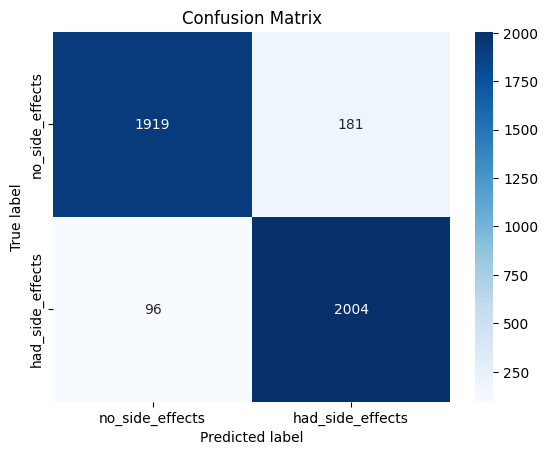

In [48]:
import seaborn as sns

plt.figsize=(6,6)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=cm_plot_labels,yticklabels=cm_plot_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Saving the model
#### 1.model.save()

In [51]:
# check if model already present with same name 
# if not save to disk

import os.path

if os.path.isfile('models/sample_nn.h5') is False:
    model.save('models/sample_nn.h5')
else:
    print('Model already present')

##### This save functions saves:

    . The architecture of the model, allowing to re-create the model.
    . The weights of the model.
    . The training configuration(loss,optimizer).
    . The state of the optimizer, allowing to resume training exactly where you lef

#### Loading the model

In [52]:
from tensorflow.keras.models import load_model

new_model = load_model('models/sample_nn.h5')

In [53]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [54]:
new_model.get_weights()

[array([[-0.45219725,  0.91925853, -0.5205984 ,  0.36485693, -0.37441325,
         -0.46006644, -0.07817322,  0.21476167, -0.22494802,  0.294506  ,
         -0.3477074 , -0.41995078, -0.34206185, -0.275019  ,  0.56433946,
         -0.03079337]], dtype=float32),
 array([ 0.        ,  0.16935256,  0.        , -0.54546666,  0.        ,
         0.        ,  0.        , -0.5814962 ,  1.112812  , -0.52735466,
         0.        ,  0.        ,  0.        ,  0.        ,  0.49471694,
         0.        ], dtype=float32),
 array([[ 0.05936974,  0.265694  ,  0.12267178, -0.30337983, -0.34722537,
         -0.33481616, -0.2760869 , -0.02966329,  0.01730567,  0.01632306,
         -0.08788839, -0.2709052 , -0.2612626 , -0.33921948, -0.21288128,
         -0.27816918, -0.1961833 ,  0.2666405 ,  0.13510704,  0.3083894 ,
          0.13272372, -0.05423388, -0.03606614,  0.30715635, -0.03214675,
         -0.13666925, -0.04062939,  0.19569615, -0.02536979, -0.2457312 ,
          0.07189596, -0.10496673],
 

In [56]:
new_model.optimizer

#### 2. model.to_json()

##### If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only

In [57]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()


In [58]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_6_input"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [59]:
# model reconstruction from JSON:

from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.kearas.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [60]:
model_architecture.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### 3. model.save_weights()

In [62]:
# check if model already present with same name 
# if not save to disk


if os.path.isfile('models/sample_nn_weights.h5') is False:
    model.save_weights('models/sample_nn_weights.h5')
else:
    print('Model already present')

Model already present


In [64]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [65]:
model2.load_weights('models/sample_nn_weights.h5')

In [67]:
model2.get_weights()

[array([[-0.45219725,  0.91925853, -0.5205984 ,  0.36485693, -0.37441325,
         -0.46006644, -0.07817322,  0.21476167, -0.22494802,  0.294506  ,
         -0.3477074 , -0.41995078, -0.34206185, -0.275019  ,  0.56433946,
         -0.03079337]], dtype=float32),
 array([ 0.        ,  0.16935256,  0.        , -0.54546666,  0.        ,
         0.        ,  0.        , -0.5814962 ,  1.112812  , -0.52735466,
         0.        ,  0.        ,  0.        ,  0.        ,  0.49471694,
         0.        ], dtype=float32),
 array([[ 0.05936974,  0.265694  ,  0.12267178, -0.30337983, -0.34722537,
         -0.33481616, -0.2760869 , -0.02966329,  0.01730567,  0.01632306,
         -0.08788839, -0.2709052 , -0.2612626 , -0.33921948, -0.21288128,
         -0.27816918, -0.1961833 ,  0.2666405 ,  0.13510704,  0.3083894 ,
          0.13272372, -0.05423388, -0.03606614,  0.30715635, -0.03214675,
         -0.13666925, -0.04062939,  0.19569615, -0.02536979, -0.2457312 ,
          0.07189596, -0.10496673],
 